#**Artificial Intelligence Assignment 2**

CREATE A DATASET OF THE INCREASING HEIGHT OF A CHILD EACH YEAR AND PREDICT THE HEIGHT OF THE CHILD FOR THE NEXT 10 YEARS

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.layers import Flatten

In [ ]:
#Creating a dataset

age_year = [('127','2011') , ('130','2012'), ('135','2013'), ('138','2014'), ('140','1015'), ('149','2016'), ('156','2017'), ('164','2018'), ('170','2019'), ('175','2020')]
df = DataFrame(age_year,columns=['Height in CM','year'])
print(df)


  Height in CM  year
0          127  2011
1          130  2012
2          135  2013
3          138  2014
4          140  1015
5          149  2016
6          156  2017
7          164  2018
8          170  2019
9          175  2020


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Height in CM  10 non-null     object
 1   year          10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [ ]:
df.describe()

,Height in CM,year
count,10,10
unique,10,10
top,175,2019
freq,1,1


In [ ]:
df.shape

(10, 2)

In [ ]:
df.isnull().sum()

Height in CM    0
year            0
dtype: int64

In [ ]:
#Preparing independent and dependent features

def prepare_data(df, n_features):
	X, y =[],[]
	for i in range(len(df)):
		
		end_ix = i + n_features
	
		if end_ix > len(df)-1:
			break
	
		seq_x, seq_y = df[i:end_ix], df[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
#Define input sequence
df_2 = [127, 130, 135, 138, 140, 149, 156, 164, 170, 175] 

#Number of time steps
n_steps = 3

#Split into samples
X, y = prepare_data(df_2, n_steps)

In [ ]:
print(X), print(y)

[[127 130 135]
 [130 135 138]
 [135 138 140]
 [138 140 149]
 [140 149 156]
 [149 156 164]
 [156 164 170]]
[138 140 149 156 164 170 175]


(None, None)

In [ ]:
#Reshape

n_features = 1

X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
print(X), print(y)

[[[127]
  [130]
  [135]]

 [[130]
  [135]
  [138]]

 [[135]
  [138]
  [140]]

 [[138]
  [140]
  [149]]

 [[140]
  [149]
  [156]]

 [[149]
  [156]
  [164]]

 [[156]
  [164]
  [170]]]
[138 140 149 156 164 170 175]


(None, None)

###MAKING AN LSTM MODEL

In [ ]:
#Define model

lstm = Sequential()
lstm.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm.add(LSTM(50, activation='relu'))
lstm.add(Dense(1))
lstm.compile(optimizer='adamax', loss='mse')

In [ ]:
#Fit lstm

lstm.fit(X, y, epochs=150, verbose=1)

Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 26182.6582
Epoch 2/150
1/1 [==============================] - 0s 10ms/step - loss: 25450.5117
Epoch 3/150
1/1 [==============================] - 0s 10ms/step - loss: 24772.8086
Epoch 4/150
1/1 [==============================] - 0s 9ms/step - loss: 24184.1211
Epoch 5/150
1/1 [==============================] - 0s 5ms/step - loss: 23606.0625
Epoch 6/150
1/1 [==============================] - 0s 7ms/step - loss: 23041.9980
Epoch 7/150
1/1 [==============================] - 0s 7ms/step - loss: 22536.8750
Epoch 8/150
1/1 [==============================] - 0s 8ms/step - loss: 22086.5156
Epoch 9/150
1/1 [==============================] - 0s 9ms/step - loss: 21669.7090
Epoch 10/150
1/1 [==============================] - 0s 7ms/step - loss: 21271.3789
Epoch 11/150
1/1 [==============================] - 0s 10ms/step - loss: 20881.9043
Epoch 12/150
1/1 [==============================] - 0s 10ms/step - loss: 20490.9023
Epoch 13/1

###PREDICTING THE NEXT 10 VALUES

In [ ]:
x_input = np.array([164, 170, 175])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} Year input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = lstm.predict(x_input, verbose=0)
        print("{} Year output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = lstm.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

[182.76826]
1 Year input [170.         175.         182.76826477]
1 Year output [[189.13359]]
2 Year input [175.         182.76826477 189.1335907 ]
2 Year output [[195.69867]]
3 Year input [182.76826 189.13359 195.69867]
3 Year output [[203.24641]]
4 Year input [189.13359 195.69867 203.24641]
4 Year output [[210.2935]]
5 Year input [195.69867 203.24641 210.2935 ]
5 Year output [[217.70695]]
6 Year input [203.24641 210.2935  217.70695]
6 Year output [[225.50185]]
7 Year input [210.2935  217.70695 225.50185]
7 Year output [[233.23805]]
8 Year input [217.70695 225.50185 233.23805]
8 Year output [[241.28938]]
9 Year input [225.50185 233.23805 241.28938]
9 Year output [[249.56717]]


In [ ]:
lst_output

[182.76826,
 189.13359,
 195.69867,
 203.24641,
 210.2935,
 217.70695,
 225.50185,
 233.23805,
 241.28938,
 249.56717]

In [ ]:
height_sequence = [127, 130, 135, 138, 140, 149, 156, 164, 170, 175]

In [ ]:
height_new = np.arange(1,10)
height_pred = np.arange(10,20)

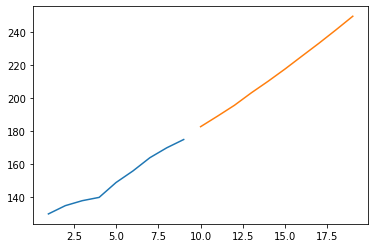

In [ ]:
plt.plot(height_new, height_sequence)
plt.plot(height_pred, lst_output)